# Importing libraries and checking data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from wordcloud import WordCloud
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.feature_extraction.text import CountVectorizer
import pickle
from sklearn.model_selection import train_test_split as tts

In [2]:
df = pd.read_csv("tickets.csv")
df.head()

,ticket
0,eit-prismadm01.tgna.tegna.com: System or agent...
1,ATL-NELLC-N9K-2: Interface state changed to op...
2,vaqupdtoms01: Device Failed Availability Check...
3,test-vm-01: VMware: VM CPU Usage Has Exceeded ...
4,NTNX-local-ds-19SM6J290326-B: Device Failed Av...


In [3]:
df["ticket"][0]
# We need take data only "understandable" parts so for make it i typed take_main_fail function

'eit-prismadm01.tgna.tegna.com: System or agent has recently restarted'

In [4]:
def take_main_fail(text):
    try:
        if text[0:4] == 'test':
            end_text = text.split(":")[2:]
        else:
            end_text = text.split(":")[1:]
    except:
        end_text = text
    
    return end_text

In [5]:
df["main_text"] = df["ticket"].apply(lambda x :take_main_fail(x))

In [6]:
df["len_texts"] = df["main_text"].apply(lambda x : len(x))

In [7]:
df["main_text"][5]
# as you can see after apply take_main_fail fucn we hade again some not clear format text sturcture
# for make it clear I am going to use make_text func for make it more clear

[' Device Failed Availability Check',
 ' Component device 18416 is not available ; Reason',
 ' At least one ancestor of IntegrateStaging (ID=> 18416) has']

In [8]:
def make_text(x):
    if len(x) == 5:
        my_list = []
        for i in x:
            a = len(i)
            my_list.append(a)

        my_list.sort(reverse=True)
        main_list = my_list[:2]
        main_text = []
        for i in x:
            if main_list[0] == len(i):
                main_text.append(i)
            elif main_list[1] == len(i):
                main_text.append(i)

        return str(my_list)
    elif len(x) == 6:
        return ' '.join(x[2:])
    elif len(x)==4:
        return x[0]
    elif len(x)==3:
        return x[0]
    elif len(x)==2:
        return ' '.join(x)
    elif len(x)==2:
        return x[0]
    elif len(x)==1:
        return ' '.join(x)
    else:
        return "nothing"

In [9]:
df["new"] = df["main_text"].apply(lambda x : make_text(x))

In [10]:
df1 = df.copy() # its just for me i love using that one for saving main dataset

In [11]:
df_problem_msg = df1.drop(["ticket","main_text","len_texts"],axis=1)

In [12]:
df_problem_msg["new1"] = df_problem_msg["new"].apply(lambda x : x.lower())

# Visualization and training

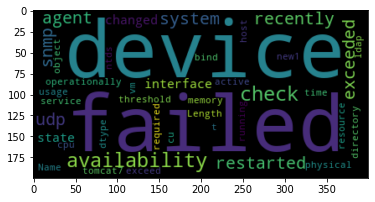

In [13]:
ws = WordCloud()
ws.generate(str(df_problem_msg["new1"]))
plt.imshow(ws, interpolation='bilinear')

In [14]:
vectorizer = CountVectorizer()

In [15]:
vectorizer.fit(df_problem_msg["new1"])

CountVectorizer()

In [16]:
# lets save it for our feature app
with open('my_words.pkl','wb') as f:
    pickle.dump(vectorizer, f)

In [26]:
vectorizer

CountVectorizer()

In [17]:
X = vectorizer.transform(df_problem_msg["new1"])

In [18]:
X_train = X[:int((X.shape[0])*0.7)] # using 70% of data for trainging

Text(0.5, 1.0, 'Finding optimal K kluster')

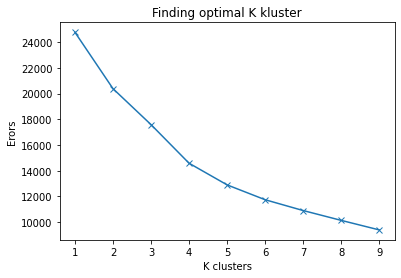

In [19]:
wss=[]
K=range(1,10)
for i in K:
    kmean=KMeans(n_clusters=i)
    kmean.fit(X_train.toarray())
    wss.append(kmean.inertia_)

plt.plot(K,wss,marker='x')
plt.xlabel('K clusters')
plt.ylabel('Erors')
plt.title("Finding optimal K kluster")

In [20]:
model = GaussianMixture(n_components=5)
labels = model.fit_predict(X_train.toarray())
df_problem_msg = df_problem_msg[:3812]
df_problem_msg['clusters'] = labels

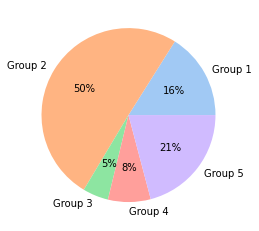

In [21]:
data = [int(df_problem_msg[df_problem_msg["clusters"]==0].shape[0]),int(df_problem_msg[df_problem_msg["clusters"]==1].shape[0]),int(df_problem_msg[df_problem_msg["clusters"]==2].shape[0]),int(df_problem_msg[df_problem_msg["clusters"]==3].shape[0]),int(df_problem_msg[df_problem_msg["clusters"]==4].shape[0])]
labels = ['Group 1', 'Group 2', 'Group 3', 'Group 4', 'Group 5']
colors = sns.color_palette('pastel')[0:5]
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

In [22]:
model_kmean = KMeans(n_clusters=5)

In [23]:
labels_kmeans = model_kmean.fit_predict(X_train.toarray())

In [24]:
df_problem_msg['clusters_kmeans'] = labels_kmeans

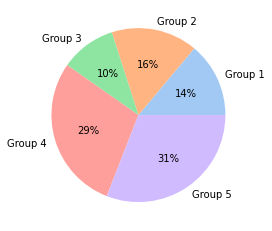

In [25]:
data_kmean = [int(df_problem_msg[df_problem_msg["clusters_kmeans"]==0].shape[0]),int(df_problem_msg[df_problem_msg["clusters_kmeans"]==1].shape[0]),int(df_problem_msg[df_problem_msg["clusters_kmeans"]==2].shape[0]),int(df_problem_msg[df_problem_msg["clusters_kmeans"]==3].shape[0]),int(df_problem_msg[df_problem_msg["clusters_kmeans"]==4].shape[0])]
labels = ['Group 1', 'Group 2', 'Group 3', 'Group 4', 'Group 5']
colors = sns.color_palette('pastel')[0:5]
plt.pie(data_kmean, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

# For saving my model I am going to use GaussianMixture because its more more soft clustering method for me with this model 

In [27]:
import pickle
with open("cluster.pkl", "wb") as f:
    pickle.dump(model,f)